In [70]:
import json
import tweepy
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret

import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [71]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [72]:
# Target Accounts
agencies=['BBCWorld','CBSNews','CNN','FoxNews','nytimes']

#empty lists of needed data
date=[]
agency_name=[]
text=[]
comp=[]
neutral=[]
negative=[]
positive=[]

#go through past 5 pages for last 100 tweets
for x in range(5):
    #go through every target account/news agency
    for agency in agencies:
        public_tweets=api.user_timeline(agency,page=x)
            # Loop through all tweets 
        for tweet in public_tweets:
            date.append(tweet['created_at'])
            agency_name.append(tweet['user']['name'])
            text.append(tweet['text'])
                
            comp.append(analyzer.polarity_scores(tweet["text"])["compound"])
            neutral.append(analyzer.polarity_scores(tweet["text"])["neu"])
            negative.append(analyzer.polarity_scores(tweet["text"])["neg"])
            positive.append(analyzer.polarity_scores(tweet["text"])["pos"])
                
#place all data in a dictionary and make dataframe
data_dicti={'Tweet Date':date,
            'News Agency':agency_name,
            'Tweet Text':text,
            'Compound Score':comp,
           'Neutral Score':neutral,
           'Negative Score':negative,
           'Positive Score':positive}

data_df=pd.DataFrame(data_dicti)
data_df



,Tweet Date,News Agency,Tweet Text,Compound Score,Neutral Score,Negative Score,Positive Score
0,Tue Jun 26 16:28:50 +0000 2018,BBC News (World),Noura Hussein: Appeals court overturns death s...,-0.5574,0.536,0.348,0.116
1,Tue Jun 26 16:02:33 +0000 2018,BBC News (World),No BBC Sports News Correspondents were harmed ...,-0.6486,0.762,0.238,0.000
2,Tue Jun 26 15:54:27 +0000 2018,BBC News (World),RT @BBCSport: FT #AUS 0-2 #PER \n\n18' ⚽ Andre...,0.5859,0.863,0.000,0.137
3,Tue Jun 26 15:51:40 +0000 2018,BBC News (World),RT @BBCSport: FT: #DEN 0-0 #FRA \n\nFrom start...,0.0000,1.000,0.000,0.000
4,Tue Jun 26 15:49:50 +0000 2018,BBC News (World),Guernsey airline Waves cancels flights for two...,-0.2263,0.808,0.192,0.000
5,Tue Jun 26 15:41:08 +0000 2018,BBC News (World),RT @BBCSport: The rags to riches story of the ...,0.4939,0.674,0.106,0.220
6,Tue Jun 26 15:32:13 +0000 2018,BBC News (World),Teenager helps deaf and blind man to communica...,-0.0258,0.629,0.189,0.182
7,Tue Jun 26 15:25:01 +0000 2018,BBC News (World),Marree Man: The enduring mystery of a giant ou...,0.0000,1.000,0.000,0.000
8,Tue Jun 26 15:19:53 +0000 2018,BBC News (World),Ottawa Bluesfest preparations obstructed by ne...,0.0000,1.000,0.000,0.000
9,Tue Jun 26 15:12:14 +0000 2018,BBC News (World),Ethiopia offers Eritrea chance to end Africa's...,-0.4404,0.576,0.281,0.144


In [74]:
#convert date strings to datetime format
data_df['Tweet Date'] = pd.to_datetime(data_df["Tweet Date"])

# Sort by tweet date
data_df.sort_values("Tweet Date", inplace=True)
data_df.reset_index(drop=True, inplace=True)

data_df.head()

,Tweet Date,News Agency,Tweet Text,Compound Score,Neutral Score,Negative Score,Positive Score
0,2018-06-25 14:12:13,BBC News (World),RT @BBCSport: GOAL! Uruguay 1-0 Russia. \n\nLu...,-0.6588,0.803,0.197,0.000
1,2018-06-25 14:26:37,BBC News (World),RT @BBCSport: GOAL! Uruguay 2-0 Russia. \n\nTh...,0.1759,0.937,0.000,0.063
2,2018-06-25 14:31:49,BBC News (World),RT @BBCSport: GOAL!\n\nThat's the Mo Salah we ...,0.5550,0.860,0.000,0.140
3,2018-06-25 14:46:00,BBC News (World),RT @BBCSport: What a moment!\n\nEssam El-Hadar...,0.2714,0.738,0.111,0.151
4,2018-06-25 14:54:34,BBC News (World),RT @BBCSport: GOAL!\n\nAnother penalty for Sau...,-0.1007,0.764,0.126,0.111


In [75]:
#extract dataframe for each seperate news agency
x=data_df[data_df['News Agency']=='BBC News (World)']
y=data_df[data_df['News Agency']=='CBS News']
z=data_df[data_df['News Agency']=='Fox News']
k=data_df[data_df['News Agency']=='The New York Times']
j=data_df[data_df['News Agency']=='CNN']

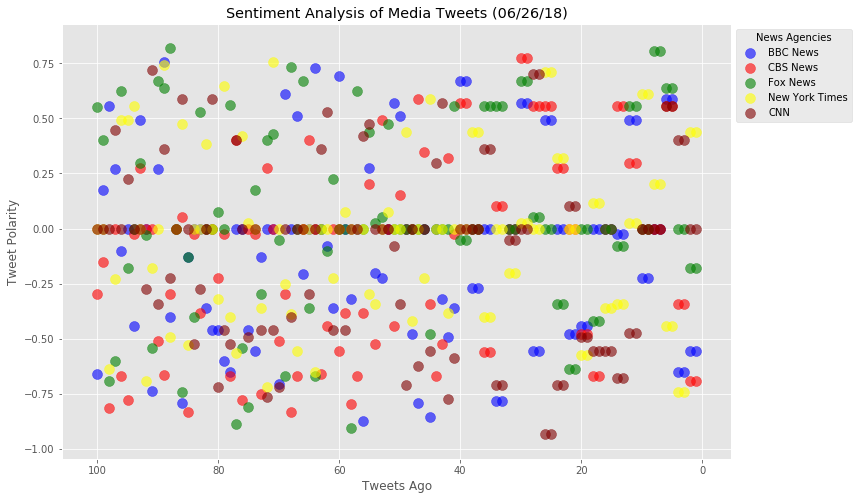

In [76]:
#plot polarity scores for each agency
plt.figure(figsize=(12,8))
plt.scatter((np.arange(-len(x),0,1)),x['Compound Score'],label='BBC News',marker='o',color='blue',s=100,alpha=0.6)
plt.scatter((np.arange(-len(y),0,1)),y['Compound Score'],label='CBS News',marker='o',color='red',s=100,alpha=0.6)
plt.scatter((np.arange(-len(z),0,1)),z['Compound Score'],label='Fox News',marker='o',color='green',s=100,alpha=0.6)
plt.scatter((np.arange(-len(k),0,1)),k['Compound Score'],label='New York Times',marker='o',color='yellow',s=100,alpha=0.6)
plt.scatter((np.arange(-len(j),0,1)),j['Compound Score'],label='CNN',marker='o',color='maroon',s=100,alpha=0.6)

legend=plt.legend(bbox_to_anchor=(1,1),loc="upper left", title="News Agencies")

plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])


# plt.savefig('output/news_sentiment_scatter.png',bbox_extra_artists=(legend,), bbox_inches='tight')

In [77]:
#autolabel definitions from before
def autolabelpos(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')

#get mean compound score for each news agency's tweets
data_df_grouped=data_df.groupby(['News Agency']).mean()['Compound Score']

data_df_grouped

News Agency
BBC News (World)     -0.091120
CBS News             -0.101242
CNN                  -0.116257
Fox News              0.051630
The New York Times   -0.030223
Name: Compound Score, dtype: float64

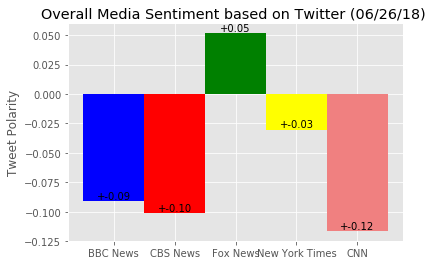

In [90]:
#all mean scores from each news agency
comp_score_means = (data_df_grouped["BBC News (World)"], 
                    data_df_grouped["CBS News"], 
                    data_df_grouped["Fox News"], 
                    data_df_grouped["The New York Times"],
                    data_df_grouped["CNN"])


#bar plot of mean polarity (comp) scores
fig, ax = plt.subplots()
tick = np.arange(len(comp_score_means))  

bar1 = ax.bar(tick[0], comp_score_means[0], 1, color="blue")
bar2 = ax.bar(tick[1], comp_score_means[1], 1, color="red")
bar3 = ax.bar(tick[2], comp_score_means[2], 1, color="green")
bar4 = ax.bar(tick[3], comp_score_means[3], 1, color='yellow')
bar5 = ax.bar(tick[4], comp_score_means[4], 1, color='lightcoral')

#use labeling definition to get label shown
autolabelpos(bar1)
autolabelpos(bar2)
autolabelpos(bar3)
autolabelpos(bar4)
autolabelpos(bar5)

ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_ylabel("Tweet Polarity")
ax.set_xticks(tick)
ax.set_xticklabels(("BBC News", "CBS News", "Fox News", "New York Times", "CNN"))

# plt.savefig("output/sentiment_bar.png",bbox_inches="tight")

